In [23]:
from PIL import Image
import colorsys
import subprocess 
import os
import sys
import matplotlib.pyplot as plt
import numpy as np



## Generaci√≥n de prueba

In [24]:
def preparar_img(name):
    img = Image.open(os.path.join(image_path,name)).convert("L")
    width, height = img.size
    data = ""
    imgdata = list(img.getdata())
    for i in range(0,height):        
        indexes = range(i*width,i*width+width)
        data = data + " ".join([str(imgdata[x]) for x in indexes]) + "\n"
    input_text = f"{height} {width}\n{data}"
    return (height, width, input_text, img)
# def correr(image_name, k, metodo):
#     datos_img = preparar_img(image_name)
#     completado = subprocess.run(["../../Resolucion/bin/ej1", f"{metodo}", f"{k}"], stdout=subprocess.PIPE, input=datos_img[2], universal_newlines=True)
#     if completado.returncode != 0:
#         print(f"ERROR: El programa finalizo de forma incorrecta. Parametros usados: k={k} metodo={metodo}")

In [58]:
image_path = "../datos_entrada/ej1/"
csvFileName="./ej1_tiempos.csv"
testCases="testCases.in"
test_times = 10
images = {
        "test1.jpg": None
}
methods = [0,1,2]

kRange = range(500,6001,500)
for path in images:
    images[path] = preparar_img(path)  

In [26]:
for k in kRange:
    for m in methods:
        for imgName,imgData in images.items():
            completado = subprocess.run(["../../Resolucion/bin/ej1", f"{m}", f"{k}"], stdout=subprocess.PIPE, input=imgData[2], universal_newlines=True)
            if completado.returncode != 0:
                print(f"ERROR: El programa finalizo de forma incorrecta. Parametros usados: k={k} metodo={metodo}")

In [66]:
csv = pandas.read_csv(csvFileName,header=None)


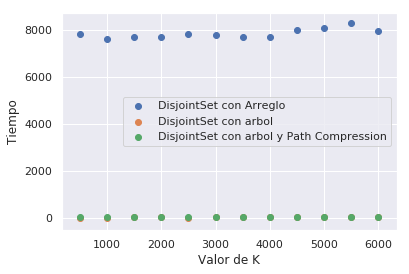

In [68]:
plt.clf()
for method in csv[0].unique():
    methodResults = csv[csv[0]==method]
    resultsByK = [np.median(methodResults[methodResults[1] == k].loc[:,2]) for k in kRange]
    plt.scatter(kRange,resultsByK,label=method)


plt.legend();
plt.xlabel("Valor de K")
plt.ylabel("Tiempo");


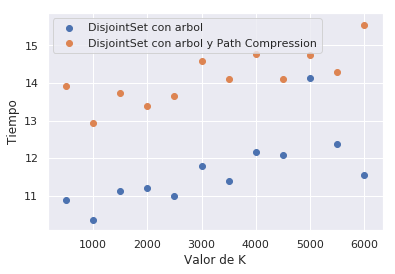

In [69]:
plt.clf()
for method in csv[0].unique():
    if method != "DisjointSet con Arreglo":
        methodResults = csv[csv[0]==method]
        resultsByK = [np.median(methodResults[methodResults[1] == k].loc[:,2]) for k in kRange]
        plt.scatter(kRange,resultsByK,label=method)


plt.legend();
plt.xlabel("Valor de K")
plt.ylabel("Tiempo");
